In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2.16 (Numerical precision) :
Implement exercise 2.4 in order to observe all the behaviours described in the lecture for EE and EI with finite precision or not.

In [26]:
def f(t, x):
    return 2 * np.power(np.abs(x), 1 / 2)

def f_exact(x, lam):
    return np.power(x - lam, 2) * (x >= lam)

In [36]:
def EE(x0,f,T,N,type=int,args=()):
    h = T/N
    t = np.linspace(0,T,N+1)
    u = np.zeros(N + 1, dtype=type)
    u[0] = x0
    for n in range(N):
        u[n + 1] = u[n] + h * f(t[n], u[n], *args)
    return t,u

def EI(x0,T,N):
    h = T/N
    t = np.linspace(0,T,N+1)
    u = np.zeros(N + 1)
    u[0] = x0
    for n in range(N):
        u[n + 1] = np.power(h + np.sqrt(h ** 2 + u[n]), 2)
    return t,u

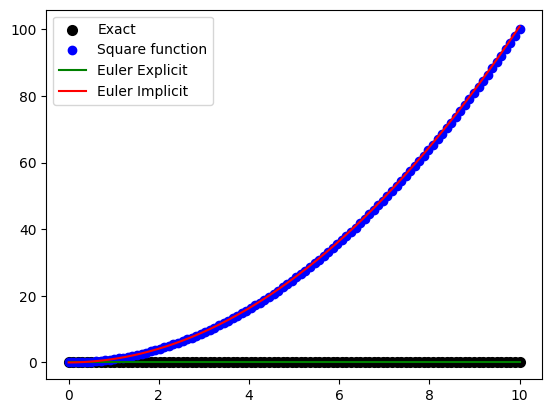

In [48]:
x0 = 1e-5
T,N = 10,1000

x = np.linspace(0,T,100)
t1,U1 = EE(x0,f,T,N)
t2,U2 = EI(x0,T,N)

plt.scatter(x,f_exact(x,T),label='Exact',lw=2,c='black')
plt.scatter(x,x**2,label='Square function',c='b')
plt.plot(t1,U1,label='Euler Explicit',c="g")
plt.plot(t2,U2,label='Euler Implicit',c="r")
plt.legend()   
plt.show()

# Exercise 2.19 (SIR model scheme order):
Write a program that solves the SIR system (2.42)-(2.44) using the Euler Explicit, Heun, and Runge-Kutta schemes of order 4 with Butcher table (2.30). Take as an example S_0 = 10.0^6, I_0 = 10, R_0 = 0 (but work with the proportions of the total population), r = 0.5, a = 0.33, T = 150.0, N = 150 (h = T /N).

1. Implement it using the ”odeint” function in python (without any scheme).

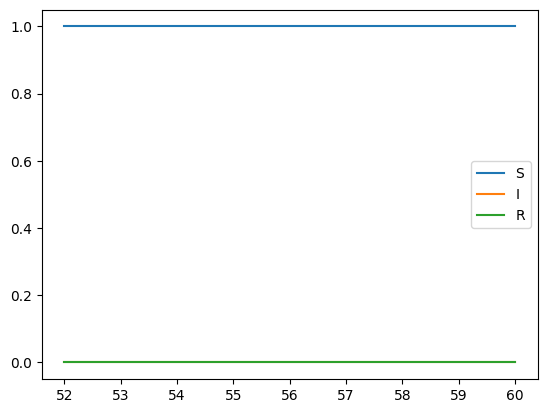

In [73]:
# Parameters:
t0, T = 52, 60
N = 150

y0 = np.array([10e6, 10, 0], dtype=np.float64)  # Initial conditions: S, I, R
y0 = y0 / np.sum(y0)  # Normalize initial conditions
a = 0.33  # Recovery rate
r = 0.5  # Infection rate
t = np.linspace(t0, T, N)

def f(y,t,a,r):
    S, I, R = y
    dS = -r*S*I
    dI = r*S*I - a*I
    dR = a*I
    return np.array([dS, dI, dR])

from scipy.integrate import odeint

y = odeint(f, y0, t,args=(a,r))

plt.plot(t, y[:,0], label='S')
plt.plot(t, y[:,1], label='I')
plt.plot(t, y[:,2], label='R')
plt.legend()


2. Study the order of the schemes by varying h and comparing it with the solution found by ’odeint’ at time T (take the error on ”S”). For this study, take T0 = 52,T = 60 (get the initial values at time T0 from the previous calculation) and h = 0.05, 0.01, 0.1, 0.5, 1, 2, 4. The result should be similar to that in figure 2.2.

In [74]:
import numpy as np

def ee(f, y0, T, N, args=()):
    """Euler Explicit method"""
    h = T / N
    t = np.linspace(0, T, N+1)
    y = np.zeros((N+1, len(y0)))
    y[0] = y0
    for i in range(N):
        y[i+1] = y[i] + h * f(y[i], t[i], *args)
    return t,y

def heun(f, y0, T, N, args=()):
    """Heun's method (Improved Euler)"""
    h = T / N
    t = np.linspace(0, T, N+1)
    y = np.zeros((N+1, len(y0)))
    y[0] = y0
    for i in range(N):
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + h * k1, t[i+1], *args)
        y[i+1] = y[i] + h / 2 * (k1 + k2)
    return t,y

def rk4(f, y0, T, N, args=()):
    """Runge-Kutta 4th order method"""
    h = T / N
    t = np.linspace(0, T, N+1)
    y = np.zeros((N+1, len(y0)))
    y[0] = y0
    for i in range(N):
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + h / 2 * k1, t[i] + h / 2, *args)
        k3 = f(y[i] + h / 2 * k2, t[i] + h / 2, *args)
        k4 = f(y[i] + h * k3, t[i+1], *args)
        y[i+1] = y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return t,y

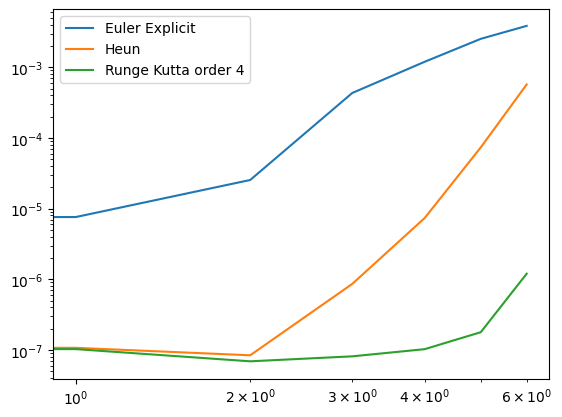

In [ ]:
h_list = [0.01, 0.05, 0.1, 0.5, 1, 2, 4]

errors_ee = []
errors_heun = []
errors_rk4 = []

def calculate_errors(sol_exact, sol_appr):
    return np.max(
        np.power(np.abs(sol_appr - sol_exact), 2)[np.isfinite(np.power(np.abs(sol_appr - sol_exact), 2))]
    )

for h in h_list:
    N = int(T / h)
    t = np.linspace(0, T, N + 1)

    _, sol_appr_EE = ee(f, y0, T, N, args=(a, r))
    _, sol_appr_H = heun(f, y0, T, N, args=(a, r))
    _, sol_appr_RK4 = rk4(f, y0, T, N, args=(a, r))
    sol_exact = odeint(f, y0, t, args=(a, r))

    errors_ee.append(calculate_errors(sol_exact, sol_appr_EE))
    errors_heun.append(calculate_errors(sol_exact, sol_appr_H))
    errors_rk4.append(calculate_errors(sol_exact, sol_appr_RK4))

plt.plot(errors_ee, label="Euler Explicit")
plt.plot(errors_heun, label="Heun")
plt.plot(errors_rk4, label="Runge Kutta order 4")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

## Exercise 2.20

Numerically study the stability of Explicit Euler for $x'(t) = \lambda x(t)$ ,with $x(0)=1, \lambda = i, T = 10*2\pi, N = 400$. Compare with Implicit Euler scheme.

In [79]:
def f(t, x, lam):
    return x * lam

In [105]:
def euler_explicit(x0,f,T,N,type=int,lam=1):
    h = T/N
    t = np.linspace(0,T,N+1)
    u = np.zeros(N + 1, dtype=type)
    u[0] = x0
    for n in range(N):
        u[n + 1] = u[n] + h * f(t[n], u[n], lam)
    return t,u

def euler_implicit(u0, T, N, lam, type=int):
    h = T / N
    t = np.linspace(0, T, N + 1)
    u = np.zeros(N + 1, dtype=type)
    u[0] = u0
    for n in range(N):
        u[n + 1] = u[n] / (1 - lam * h)
    return t, u

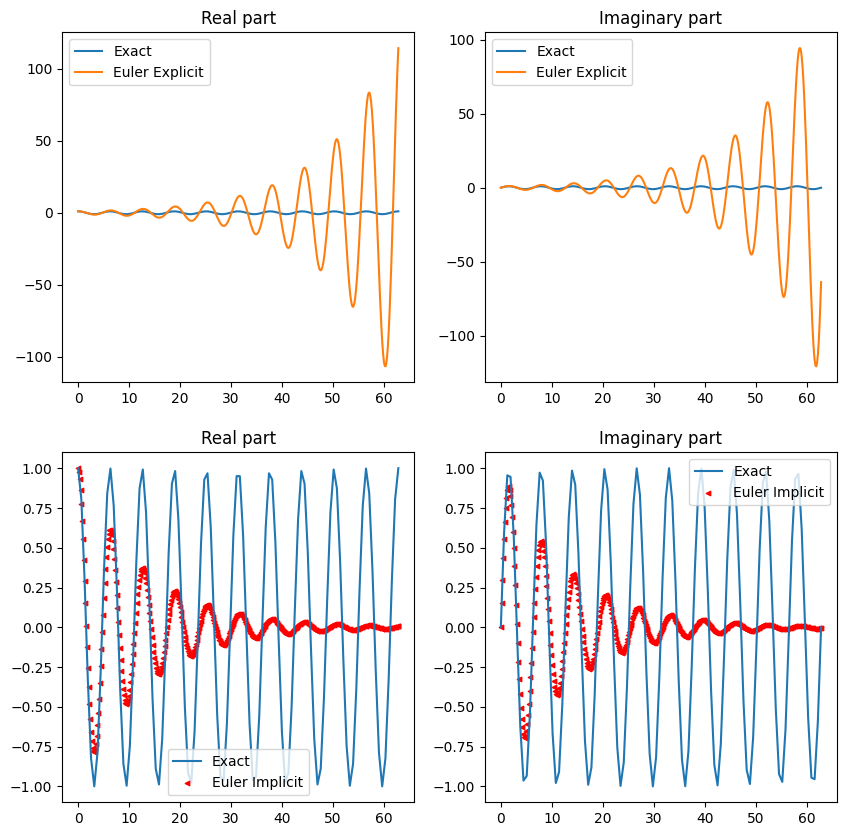

In [118]:
# Parameters
x0 = 1
T = 10 * 2 * np.pi
N = 400
lam = 1j

# Exact solution
x = np.linspace(0, T, 100)
x_exact = x0 * np.exp(lam * x)

# Euler Explicit
t, U = euler_explicit(x0, f, T, N,type=complex, lam=lam)
t2,U2 = euler_implicit(x0,T,N, lam, type=complex)

fig,ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].plot(x, x_exact.real, label='Exact')
ax[0,0].plot(t, U.real, label='Euler Explicit')
ax[0,0].set_title('Real part')
ax[0,0].legend()

ax[0,1].plot(x,x_exact.imag , label='Exact')
ax[0,1].plot(t, U.imag, label='Euler Explicit')
ax[0,1].set_title('Imaginary part')
ax[0,1].legend()

ax[1,0].plot(x, x_exact.real, label='Exact')
ax[1,0].scatter(t2, U2.real, label='Euler Implicit',marker='<',c='r',s=10)
ax[1,0].set_title('Real part')
ax[1,0].legend()

ax[1,1].plot(x, x_exact.imag, label='Exact')
ax[1,1].scatter(t2, U2.imag, label='Euler Implicit',marker='<',c='r',s=10)
ax[1,1].set_title('Imaginary part')
ax[1,1].legend()


## Exercise 2.21 

Conseder a three star system in 2 dimensions. We suppose each star moves under the Newton's law of gravity (attraction with respect to other two star). We consider each of them to have unit mass and initial positions forming a scalene triangle (that is no two sides are equal); you can also take initial position at random (independent normal variable in 2D). Initial velocities are taken to be zero. Compare the effect of initial data on the long time solution. 
Recall that, if one denotes $X^k$ the position and $m_k$ the masses (here al equal to 1), the esaution are : 
$$
\frac{d^2}{dt^2} X^k (t) = -g \sum_{l \neq m} {m_l \frac{X^k - X^l}{\left\lVert X^k - X^l \right\rVert ^3}}
$$

Here g is the gravitational constant (can be taken equal to 1 too)